In [18]:
#LEO EL DATASET
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/aromerq/Documents/Estudio/MTI/Ciencia_Datos/Tallerproyecto/Merma_investigation/clustering/df_clustering_norm.csv")
df.head()

,Unnamed: 0,item_nbr,store_nbr,Shlf_Life_Days_Qty,ADJ_RETAIL_AMT,ADJ_UNIT_QTY,sales_retail_amt,sales_unit_qty,DATE_DAY,WEEK_NUMBER,IS_WEEKDAY,zone,SALES_WASTE_PERCENT,WASTE_ABOVE_MEAN,SALE_ABOVE_MEAN,YEAR,MONTH,DAY
0,1,386728,149,8.0,-1840.0,-1.0,18290.0,10.0,Monday,27,1,zona_central,1.840000e+04,1,0,2021,7,5
1,14,647086,653,90.0,-1420.0,-1.0,1420.0,1.0,Wednesday,27,1,zona_central,1.420000e+05,1,0,2021,7,7
2,24,238594,695,22.0,-10460.0,-5.0,2093.0,1.0,Saturday,27,0,zona_central,1.046000e+06,0,0,2021,7,10
3,32,398021,51,26.0,-311.0,-1.0,17727.0,57.0,Sunday,28,0,zona_central,5.456140e+02,1,1,2021,7,18
4,39,613568,934,30.0,-14014.0,-49.0,1916.0,7.0,Monday,29,1,zona_central,2.002000e+05,0,0,2021,7,19


In [19]:
df.columns

Index(['Unnamed: 0', 'item_nbr', 'store_nbr', 'Shlf_Life_Days_Qty',
       'ADJ_RETAIL_AMT', 'ADJ_UNIT_QTY', 'sales_retail_amt', 'sales_unit_qty',
       'DATE_DAY', 'WEEK_NUMBER', 'IS_WEEKDAY', 'zone', 'SALES_WASTE_PERCENT',
       'WASTE_ABOVE_MEAN', 'SALE_ABOVE_MEAN', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

In [3]:
df.shape

(591684, 27)

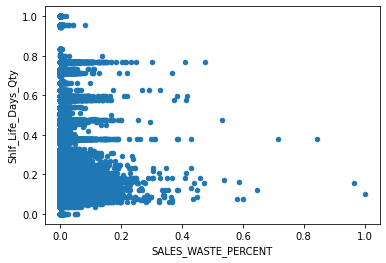

In [4]:
df.plot(x='SALES_WASTE_PERCENT', y='Shlf_Life_Days_Qty', kind='scatter');

In [5]:
#FILTRO PARTE DE LOS DATOS
#df2 = df[0:90000] 

df2 = df.sample(frac=0.25,random_state=60)

In [6]:
df2.shape

(147921, 27)

In [7]:
df2 = df2[['item_nbr', 'store_nbr', 'Shlf_Life_Days_Qty',
       'ADJ_RETAIL_AMT', 'ADJ_UNIT_QTY', 'sales_retail_amt', 'sales_unit_qty',
       'WEEK_NUMBER', 'IS_WEEKDAY', 'SALES_WASTE_PERCENT', 'WASTE_ABOVE_MEAN',
       'SALE_ABOVE_MEAN', 'norte_chico',
       'norte_grande', 'zona_central', 'zona_sur']]

In [8]:
df2.head()

,item_nbr,store_nbr,Shlf_Life_Days_Qty,ADJ_RETAIL_AMT,ADJ_UNIT_QTY,sales_retail_amt,sales_unit_qty,WEEK_NUMBER,IS_WEEKDAY,SALES_WASTE_PERCENT,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,norte_chico,norte_grande,zona_central,zona_sur
15864,236441,139,0.172414,0.999296,0.999065,0.022070,0.018613,0.568627,1.0,0.000053,...,0,0,0,0,1,0,0,0,1,0
533385,555923,140,0.215517,0.999705,1.000000,0.013684,0.005922,0.372549,1.0,0.000066,...,0,0,0,0,1,0,0,0,1,0
100262,649780,644,0.181034,0.992070,0.997194,0.024507,0.003384,0.725490,1.0,0.002745,...,0,0,0,0,0,0,0,0,1,0
176210,398021,653,0.215517,0.999277,0.999065,0.013315,0.004230,0.784314,1.0,0.000212,...,0,0,0,0,0,0,0,0,1,0
468304,615920,685,0.715517,0.998358,1.000000,0.017312,0.001692,0.235294,1.0,0.000954,...,0,0,0,0,0,0,0,0,1,0


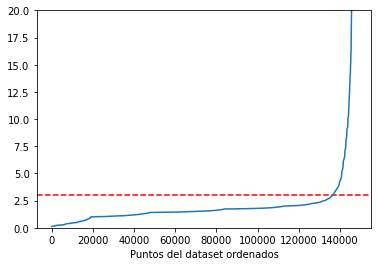

In [9]:
#MÉTODO DE LA RODILLA PARA ESTIMAR EPS 
#calcular la distancia promedio de cada punto a sus k vecinos más cercanos
from sklearn.neighbors import NearestNeighbors
import numpy as np

N = 5
nbrs = NearestNeighbors(n_neighbors=N).fit(df2)
distances, indices = nbrs.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=3, color='r', linestyle='--')
plt.xlabel('Puntos del dataset ordenados')
plt.ylim(-0.0001, 20)
plt.plot(distances);

In [10]:
#Implementamos DBSCAN
from sklearn.cluster import DBSCAN

eps = 2.5 #Pendiente probar con 40
min_samples = 4
#EPS: Radio 
#MinPts: Numero mínimo puntos en una región
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df2)

In [11]:
import numpy as np
np.unique(db.labels_)

array([   -1,     0,     1, ..., 10556, 10557, 10558])

In [12]:
df2['Cluster ID'] = db.labels_
df2

,item_nbr,store_nbr,Shlf_Life_Days_Qty,ADJ_RETAIL_AMT,ADJ_UNIT_QTY,sales_retail_amt,sales_unit_qty,WEEK_NUMBER,IS_WEEKDAY,SALES_WASTE_PERCENT,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,norte_chico,norte_grande,zona_central,zona_sur,Cluster ID
15864,236441,139,0.172414,0.999296,0.999065,0.022070,0.018613,0.568627,1.0,0.000053,...,0,0,0,1,0,0,0,1,0,0
533385,555923,140,0.215517,0.999705,1.000000,0.013684,0.005922,0.372549,1.0,0.000066,...,0,0,0,1,0,0,0,1,0,1
100262,649780,644,0.181034,0.992070,0.997194,0.024507,0.003384,0.725490,1.0,0.002745,...,0,0,0,0,0,0,0,1,0,2
176210,398021,653,0.215517,0.999277,0.999065,0.013315,0.004230,0.784314,1.0,0.000212,...,0,0,0,0,0,0,0,1,0,3
468304,615920,685,0.715517,0.998358,1.000000,0.017312,0.001692,0.235294,1.0,0.000954,...,0,0,0,0,0,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290623,634021,134,0.086207,0.998219,0.998129,0.016180,0.005076,0.058824,0.0,0.000443,...,1,0,0,0,0,0,0,1,0,-1
439906,529697,8,0.379310,0.995073,1.000000,0.017269,0.000000,0.254902,0.0,0.008537,...,0,1,0,0,0,0,0,1,0,-1
205316,590412,653,0.181034,0.997569,1.000000,0.024293,0.002538,0.843137,0.0,0.001056,...,1,0,0,0,0,0,0,1,0,1570
495141,675147,612,0.146552,0.993137,1.000000,0.020078,0.000000,0.333333,1.0,0.011882,...,0,0,0,0,0,0,0,1,0,1894


In [13]:
df2.groupby(['Cluster ID']).count()['store_nbr']

Cluster ID
-1        32731
 0            5
 1           20
 2           24
 3           35
          ...  
 10554        4
 10555        5
 10556        4
 10557        4
 10558        4
Name: store_nbr, Length: 10560, dtype: int64

/Users/aromerq/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


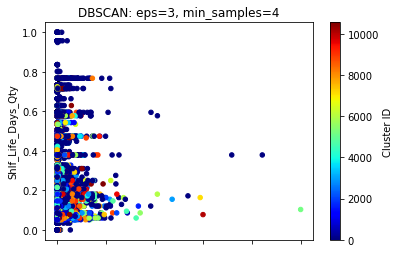

In [14]:
import matplotlib.pyplot as plt

#2D
df2.plot(x='SALES_WASTE_PERCENT', y='Shlf_Life_Days_Qty', c='Cluster ID', colormap='jet', kind='scatter')
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

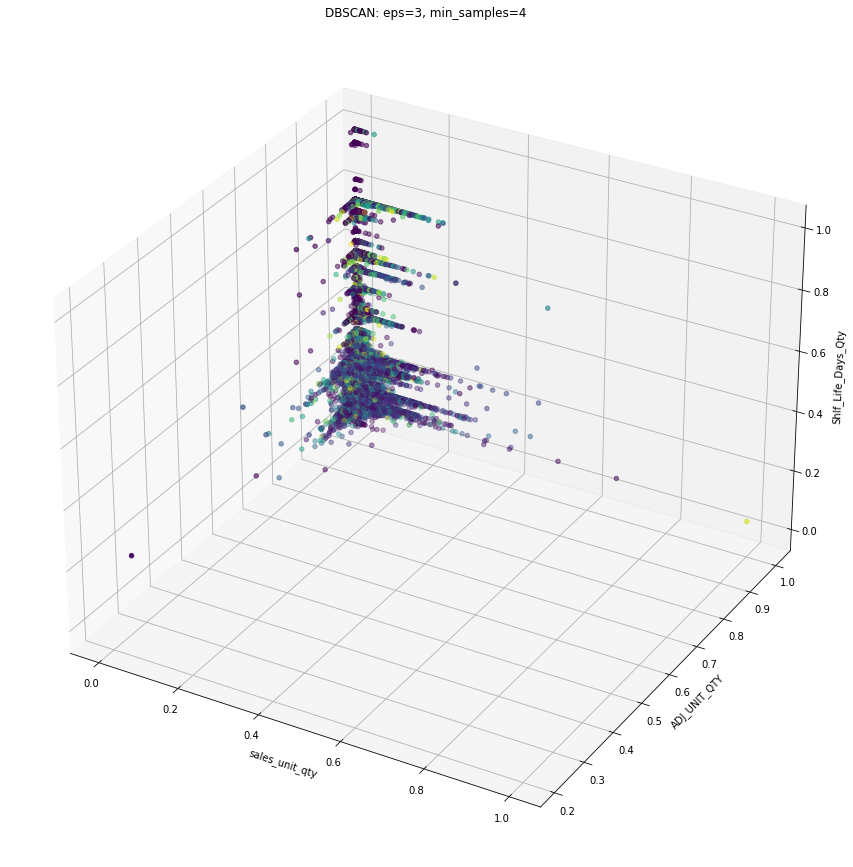

In [15]:
import matplotlib.pyplot as plt

#3D
fig = plt.figure(figsize=(15, 50))
ax = plt.axes(projection ='3d')
ax.scatter(df2['sales_unit_qty'], df2['ADJ_UNIT_QTY'], df2['Shlf_Life_Days_Qty'], c = df2['Cluster ID'])
ax.set_xlabel("sales_unit_qty")
ax.set_ylabel("ADJ_UNIT_QTY")
ax.set_zlabel("Shlf_Life_Days_Qty")
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

In [16]:
#IMPLEMENTAR MEDICIÓN
from sklearn.metrics import silhouette_score as ss

#to_test = [(5,3), (120,3)]

#for min_samples, eps in to_test:
db = DBSCAN(eps=eps, min_samples=min_samples).fit(df2)
print(f"Para eps={eps}, min_samples={min_samples}, el coeficiente de Silhouette es {ss(df2, db.labels_)}")
#-1 = mal agrupamiento
#0 = indiferente
#1 = buen agrupamiento

Para eps=3, min_samples=4, el coeficiente de Silhouette es 0.5389463081484632
